In [1]:
library(tidyverse)
library(hrbrthemes)
library(zoo)
options(repr.plot.width = 18, repr.plot.height = 9)


── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attache Paket: ‘zoo’


Die folgenden Objekte sind maskiert von ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
vols <- merge(read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/participants.tsv', sep='\t', header=T) %>%
                rename(IDs=sid),
      read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/FASTSURFER_SEG/fastsurfer_vol.csv', sep=',', header=T) %>%
                select(IDs, matches('relative$')), by='IDs') %>% select(-sex)

In [3]:
qc <- read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv', sep=',', header=T) %>%
select(c(subject, qc_inclusion)) %>% rename(IDs = subject)

In [4]:
data <- merge(vols,
              qc,
              by='IDs') %>% filter(qc_inclusion == 'yes') %>% select(-qc_inclusion)

In [5]:
data %>% head()

,IDs,age,Frontal_relative,Hippocampus_relative,Frontal_Parietal_relative,Parietal_relative,Insula_relative,Cingulate_relative,Occipital_relative,BasalGanglia_relative,Thalamus_relative,Cerebellum_relative,CorpusCallosum_relative,Ventricles_relative,VentralDC_relative,WM_relative,Brainstem_relative,Temporal_relative
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sub-k10010,9.67,0.2800167,0.01081161,0.009991971,0.1918296,0.01939324,0.03621298,0.08002712,0.03291269,0.01938382,0.1936776,0.004646920,0.015876955,0.009752098,0.6045110,0.02530273,0.1871088
2,sub-k10020,10.08,0.2657804,0.01020462,0.011213374,0.1796356,0.01715888,0.03975895,0.07885005,0.02789111,0.02110563,0.1806668,0.004957177,0.008880753,0.009625882,0.5632574,0.02503816,0.1757229
3,sub-k10030,8.75,0.2717389,0.01065245,0.012636043,0.1857782,0.01906376,0.03247655,0.07581873,0.03422492,0.01943202,0.1955771,0.005405413,0.027387067,0.010493792,0.5203165,0.02473497,0.1730535
4,sub-k10040,8.92,0.2570214,0.01059152,0.011882834,0.1824769,0.01769342,0.03956303,0.08069209,0.03079248,0.01974283,0.2003720,0.004725129,0.014038150,0.010630715,0.5843249,0.02729981,0.1813960
5,sub-k10050,9.42,0.2923676,0.01219277,0.014067675,0.2204450,0.01965062,0.04073151,0.08537101,0.03084292,0.02194556,0.1769819,0.004742473,0.011705219,0.010639831,0.5677163,0.02610110,0.2033399
6,sub-k10070,10.08,0.2532972,0.01161793,0.011103516,0.1673918,0.01710069,0.03213288,0.06191859,0.03202440,0.02229942,0.2318179,0.004717673,0.011850407,0.010631096,0.5507143,0.02988509,0.1760238


In [6]:
mov_perc <- data %>% gather(key='ROI', value='Volume', -c(IDs, age)) %>%
mutate(r_age = round(age,0)) %>%
arrange(ROI, age) %>%
group_by(ROI) %>%
summarize(p05=rollapply(Volume,5,quantile,prob=0.05, fill=NA),
          p50=rollapply(Volume,5,quantile,prob=0.50,fill=NA),
         p95=rollapply(Volume,5,quantile,prob=0.95,fill=NA))

mov_perc %>% head()

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'ROI'. You can override using the `.groups` argument.


ROI,p05,p50,p95
<chr>,<dbl>,<dbl>,<dbl>
BasalGanglia_relative,NA,NA,NA
BasalGanglia_relative,NA,NA,NA
BasalGanglia_relative,0.02646774,0.03366257,0.03816110
BasalGanglia_relative,0.02646774,0.03366257,0.03756933
BasalGanglia_relative,0.02669096,0.03366257,0.03756933
BasalGanglia_relative,0.03225395,0.03366257,0.03756933


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 64 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 64 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 64 rows containing non-finite values (`stat_smooth()`).”


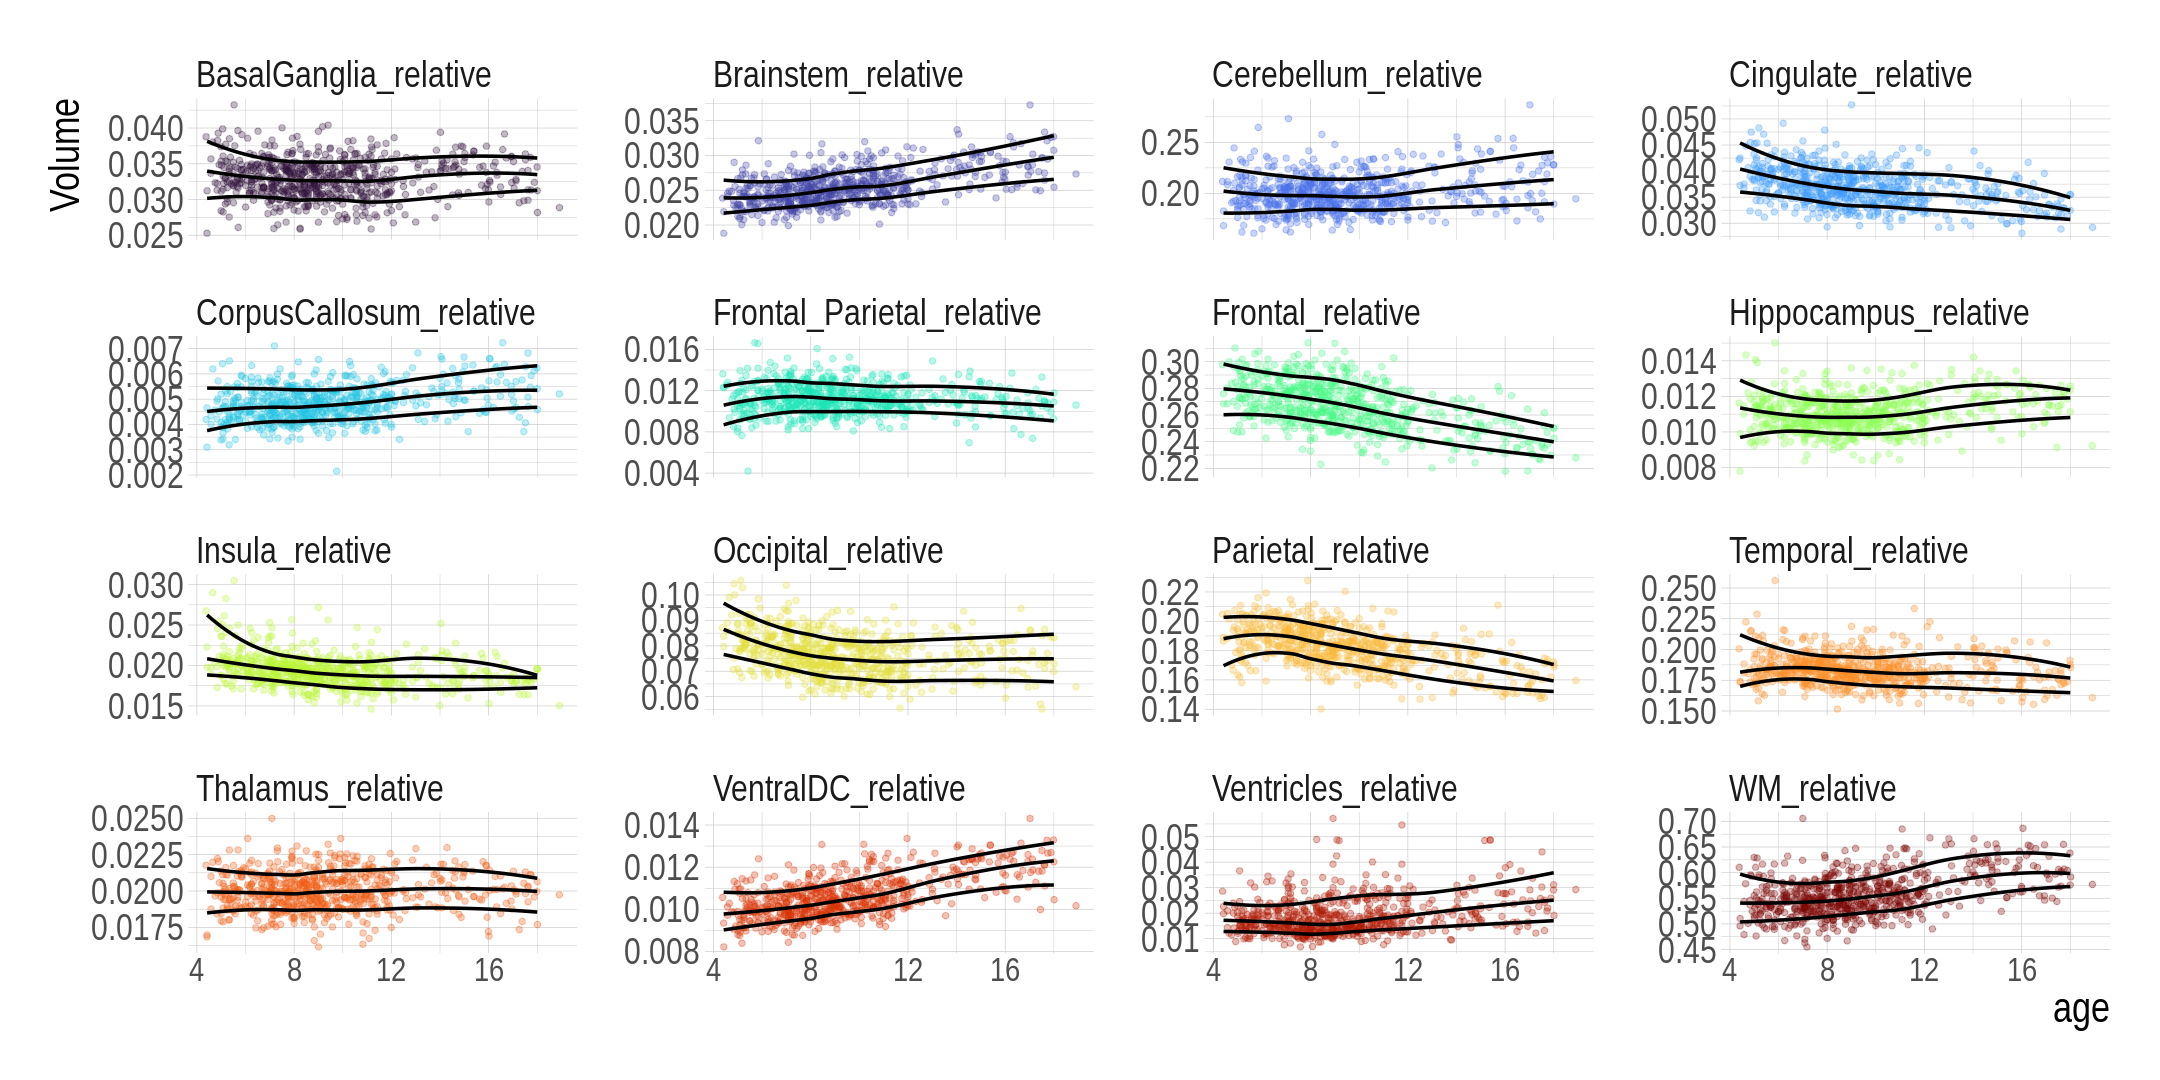

In [9]:
data %>% gather(key='ROI', value='Volume', -c(IDs, age)) %>%
arrange(ROI, age) %>%
mutate(p05 = mov_perc$p05, p50 = mov_perc$p50, p95 = mov_perc$p95) %>%

ggplot(aes(x=age, y=Volume, color=ROI, fill=ROI))+
geom_jitter(alpha=0.3)+
geom_smooth(aes(x=age, y=p05), color='black', se=F)+
geom_smooth(aes(x=age, y=p50), color='black', se=F)+
geom_smooth(aes(x=age, y=p95), color='black', se=F)+
#geom_point(aes(x=age, y=mov_median), color='black', alpha=0.01)+
facet_wrap(~ROI, scale='free_y')+
theme_ipsum()+
scale_color_viridis_d(option='turbo')+
    theme(axis.title.x=element_text(size=25),
     axis.title.y=element_text(size=25),
     strip.text = element_text(size = 22),
     axis.text.x = element_text(size=20),#, angle=90,hjust=0.95,vjust=0.2),
     axis.text.y = element_text(size=22),
    legend.title = element_text(size=22),
    legend.text = element_text(size=22),
    legend.position='none'
     )

In [109]:
vols2<- merge(read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/participants.tsv', sep='\t', header=T) %>%
                rename(IDs=sid),
      read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/FASTSURFER_SEG/fastsurfer_vol.csv', sep=',', header=T) %>%
                select(IDs, eTIV),
              by='IDs')
qc <- read.table('/home/ibrazug/Dokumente/KindersegV2/Ibra/derivatives/QC_SC_RESULT.csv', sep=',', header=T) %>%
select(c(subject, qc_inclusion)) %>% rename(IDs = subject)

data2<- merge(vols2,
              qc,
              by='IDs') %>% filter(qc_inclusion == 'yes') %>% select(-qc_inclusion)

In [ ]:
mov_perc <- data2 %>% gather(key='ROI', value='Volume', -c(IDs, age)) %>%
mutate(r_age = round(age,0)) %>%
arrange(ROI, age) %>%
group_by(ROI) %>%
summarize(p25=rollapply(Volume,5,quantile,prob=0.05, fill=NA),
          p50=rollapply(Volume,5,quantile,prob=0.50,fill=NA),
         p75=rollapply(Volume,5,quantile,prob=0.95,fill=NA))

mov_perc %>% head()

In [117]:
mov_perc2 <- data2 %>% select(eTIV, sex, age) %>%
arrange(sex,age) %>%
group_by(sex) %>%
summarize(eTIV05=rollapply(eTIV,5,quantile,prob=0.05, fill=NA),
          eTIV50=rollapply(eTIV,5,quantile,prob=0.50,fill=NA),
         eTIV95=rollapply(eTIV,5,quantile,prob=0.95,fill=NA))

`summarise()` has grouped output by 'sex'. You can override using the `.groups` argument.


In [118]:
mov_perc2 %>% head()

sex,eTIV05,eTIV50,eTIV95
<chr>,<dbl>,<dbl>,<dbl>
F,NA,NA,NA
F,NA,NA,NA
F,1007463,1155892,1564860
F,1007463,1316778,1566369
F,1007463,1316778,1359832
F,1007463,1324323,1470222


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”


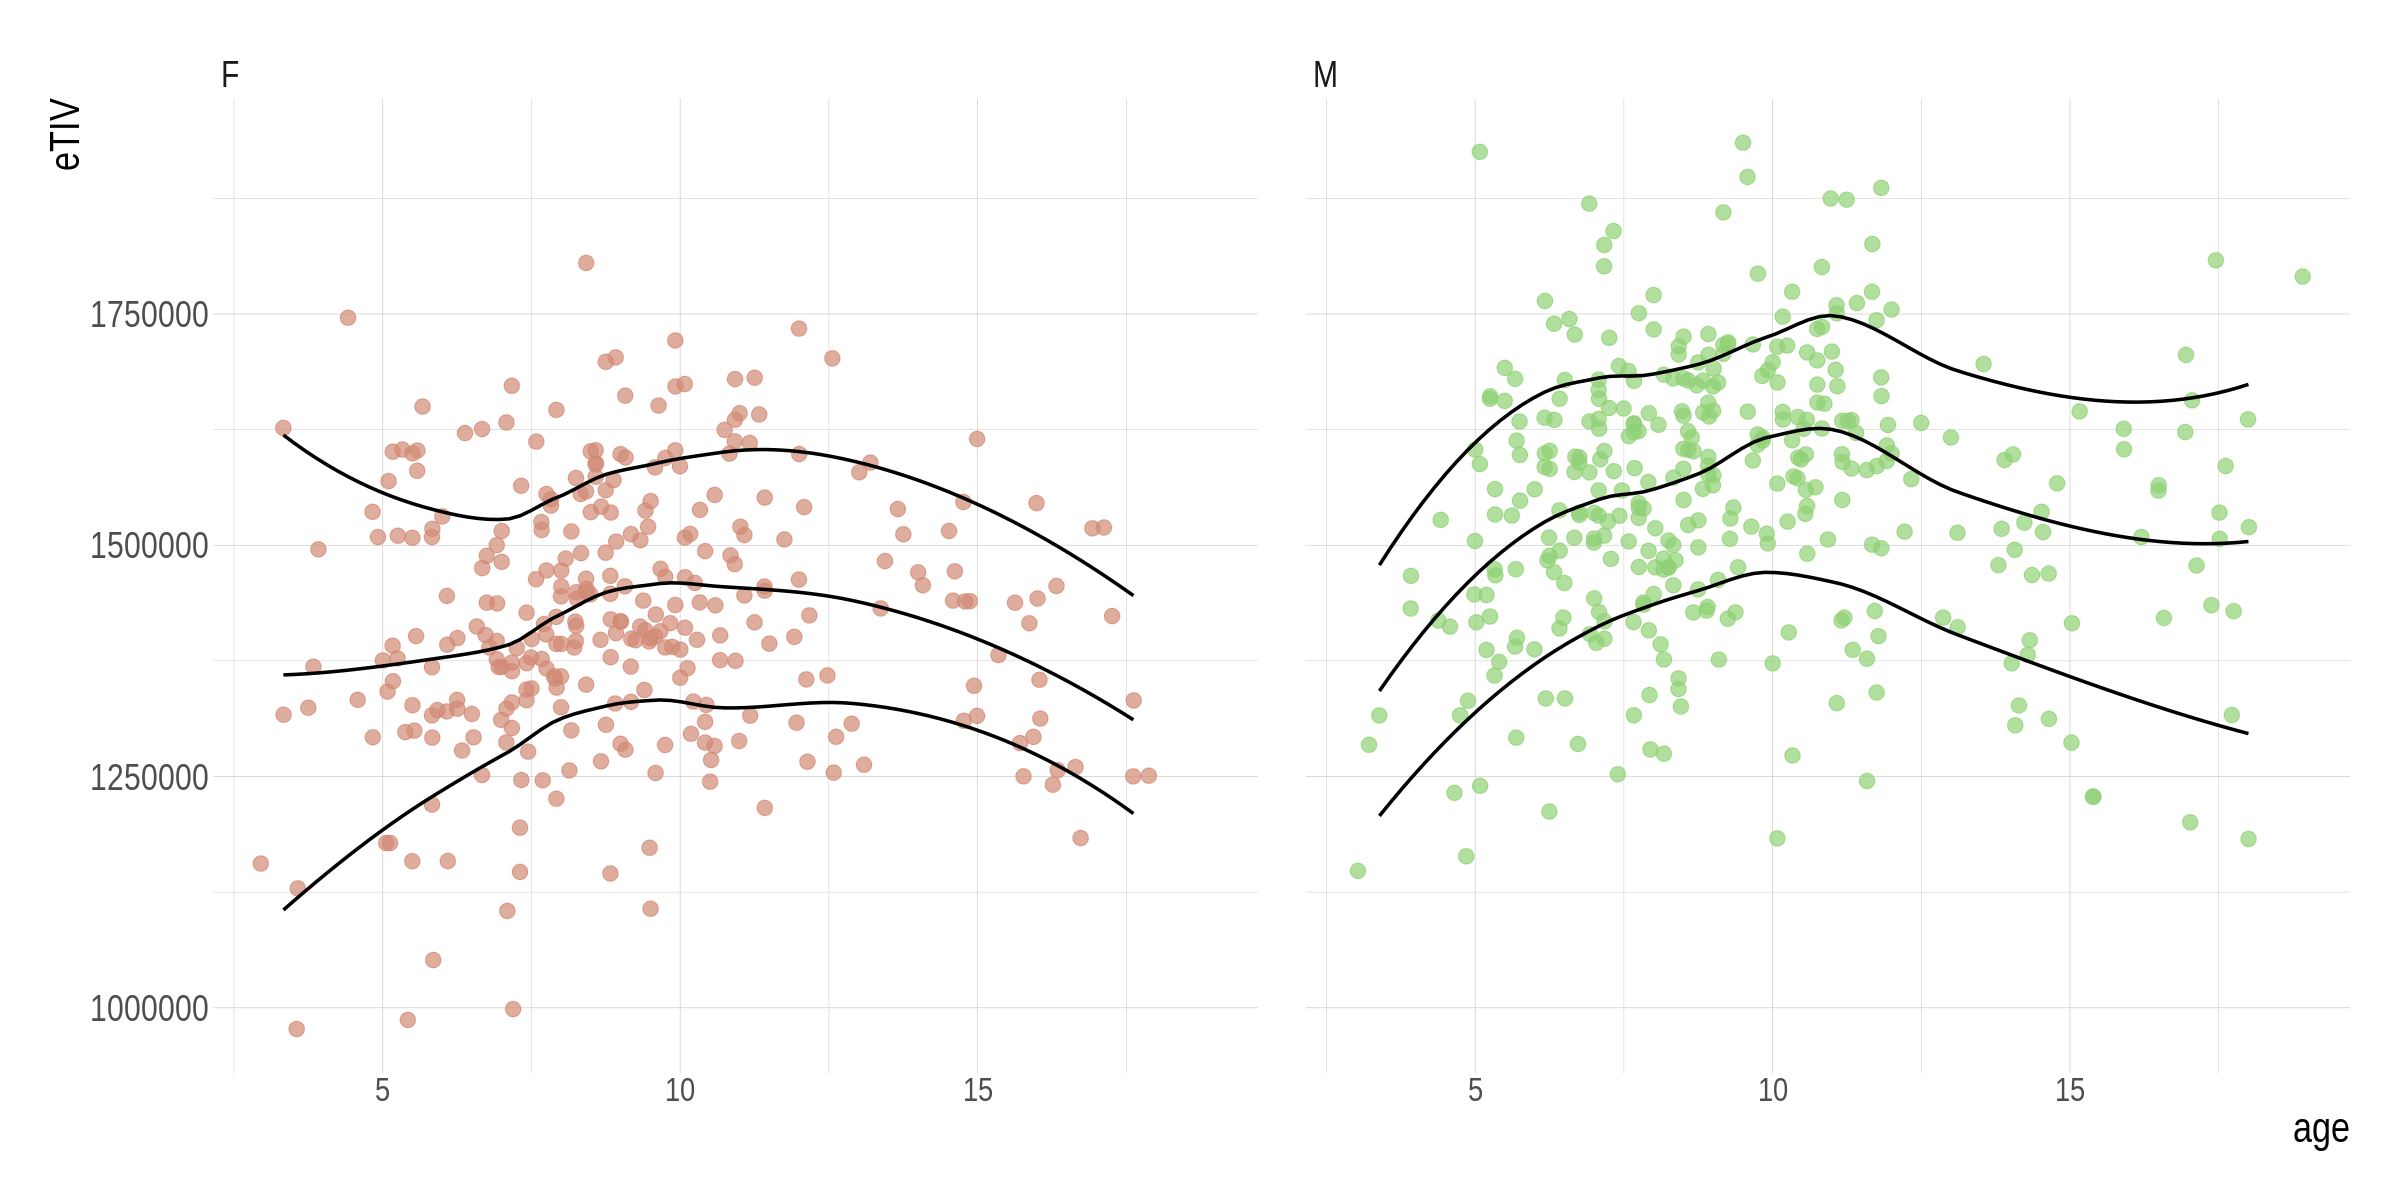

In [125]:
data2 %>% select(eTIV, sex, age) %>%
arrange(sex,age) %>%
mutate(eTIV05 = mov_perc2$eTIV05,
      eTIV50 = mov_perc2$eTIV50,
      eTIV95 = mov_perc2$eTIV95) %>%
ggplot(aes(x=age, y=eTIV, color=sex))+
geom_jitter(alpha=0.7, size=4)+
geom_smooth(aes(x=age, y=eTIV05), color='black', se=F)+
geom_smooth(aes(x=age, y=eTIV50), color='black', se=F)+
geom_smooth(aes(x=age, y=eTIV95), color='black', se=F)+
facet_wrap(~sex)+
theme_ipsum()+
scale_color_ipsum()+
    theme(axis.title.x=element_text(size=25),
     axis.title.y=element_text(size=25),
     strip.text = element_text(size = 22),
     axis.text.x = element_text(size=20),#, angle=90,hjust=0.95,vjust=0.2),
     axis.text.y = element_text(size=22),
    legend.title = element_text(size=22),
    legend.text = element_text(size=22),
    legend.position='none'
     )